/opt/homebrew/Caskroom/miniforge/base/envs/dev_env/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/homebrew/Caskroom/miniforge/base/envs/dev_env/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10


/opt/homebrew/Caskroom/miniforge/base/envs/dev_env/lib/python3.9/site-packages/keras/src/backend/tensorflow/nn.py:602: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 447s 279ms/step - accuracy: 0.4623 - loss: 1.7229 - val_accuracy: 0.7254 - val_loss: 0.7978
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 437s 280ms/step - accuracy: 0.7496 - loss: 0.7384 - val_accuracy: 0.7741 - val_loss: 0.6682
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 648s 415ms/step - accuracy: 0.8291 - loss: 0.5066 - val_accuracy: 0.7890 - val_loss: 0.6304
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 454s 291ms/step - accuracy: 0.8660 - loss: 0.4011 - val_accuracy: 0.7939 - val_loss: 0.6562
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 461s 295ms/step - accuracy: 0.9002 - loss: 0.2994 - val_accuracy: 0.8039 - val_loss: 0.6578
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 563s 360ms/step - accuracy: 0.9240 - loss: 0.2249 - val_accuracy: 0.7911 - val_loss: 0.7453
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 471s 301ms/step - accuracy: 0.9416 - loss: 0.1740 - val_accuracy: 0.8130 - val_loss: 0.7076
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 461s 295ms/step - accuracy: 0.9

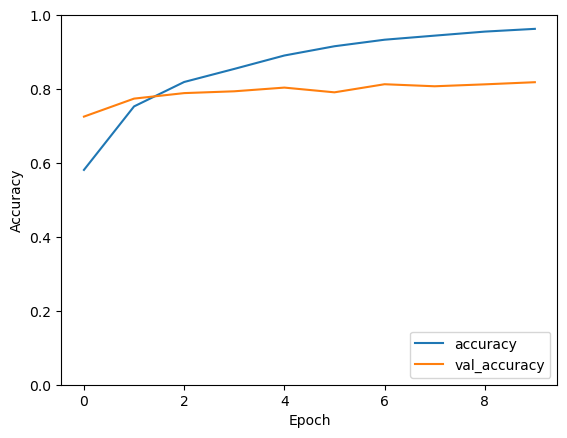

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# CIFAR-10 데이터셋 불러오기
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# 데이터 전처리: 픽셀 값을 0~1 사이로 정규화
train_images, test_images = train_images / 255.0, test_images / 255.0


# 데이터 증강 설정
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    zoom_range=0.1,
    fill_mode='nearest')

# 데이터 증강 적용
datagen.fit(train_images)
# Convolutional Neural Network (CNN) 모델 정의
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),  # 추가된 층
    layers.Flatten(),
    layers.Dense(128, activation='relu'),  # 변경된 뉴런 수
    layers.Dense(10)
])
base_model = tf.keras.applications.ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))


model = models.Sequential()
model.add(base_model)
model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dense(10, activation='softmax'))
# 모델 컴파일
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)  # 학습률 조정
model.compile(optimizer=optimizer,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
# 모델 훈련
history = model.fit(train_images, train_labels, epochs=10,  
                    validation_data=(test_images, test_labels))

# 모델 평가
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

base_model = tf.keras.applications.ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))



# 정확도 및 손실 그래프 그리기
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

     
